In [123]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
directory = os.path.join(dataset_path, 'fly_087', 'func_0')

In [3]:
timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
fictrac_raw = bbb.load_fictrac(os.path.join(directory, 'fictrac'))


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 53.70 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.28 sec


In [4]:
## Load neural data
brain_file = os.path.join(directory, 'brain_zscored_green_high_pass_masked.nii')
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [255]:
### Create fictrac timepoint vector
fps = 50
expt_len = 1000*30*60
camera_rate = 1/fps * 1000 # camera frame rate in ms
x_original = np.arange(0,expt_len,camera_rate)

### Create fictrac interp object
behavior = ['dRotLabY']
fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(fictrac_raw[behavior])[:,0],25,3)
#fictrac_smoothed = np.clip(fictrac_smoothed, a_min=None,a_max=0)
#fictrac_smoothed = np.abs(fictrac_smoothed)
fictrac_interp_temp = interp1d(x_original, fictrac_smoothed, bounds_error = False)

# Pull from interp object at desired timepoints
fictrac_interp = fictrac_interp_temp(timestamps[:,23])
np.nan_to_num(fictrac_interp, copy=False);

In [103]:
timepoint_shifts = list(range(-100,100,5)) # in ms

fictrac_shifts = []
for shift in timepoint_shifts:
    fictrac_interp = np.nan_to_num(fictrac_interp_temp(timestamps[:,23]+shift), copy=False);
    fictrac_shifts.append(scipy.stats.pearsonr(fictrac_interp, brain_flat[12822,:])[0])

In [139]:
np.max(fictrac_shifts)

nan

In [140]:
timepoint_shifts = list(range(-100,100,10)) # in ms

lag_time_peak = []
lag_corr_values = []
for i in range(32768):
    if i%1000==0:
        print(i)
    fictrac_shifts = []
    for shift in timepoint_shifts:
        fictrac_interp = np.nan_to_num(fictrac_interp_temp(timestamps[:,23]+shift), copy=False);
        fictrac_shifts.append(scipy.stats.pearsonr(fictrac_interp, brain_flat[i,:])[0])
    lag_time_peak.append(timepoint_shifts[np.argmax(fictrac_shifts)])
    lag_corr_values.append(np.max(fictrac_shifts))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000


In [141]:
lag_time_peak_ = np.reshape(lag_time_peak, (256,128))
lag_corr_values_ = np.reshape(lag_corr_values, (256,128))

In [202]:
brain_flat.shape

(32768, 3384)

In [203]:
brain.shape

(256, 128, 49, 3384)

In [256]:
timepoint_shifts = list(range(-1000,1000,10)) # in ms

fictrac_shifts = []
for shift in timepoint_shifts:
    fictrac_interp = np.nan_to_num(fictrac_interp_temp(timestamps[:,23]+shift), copy=False);
    fictrac_shifts.append(scipy.stats.pearsonr(fictrac_interp, brain[117,50,23,:])[0])

Text(0.5, 1.0, 'FB voxel with rot V')

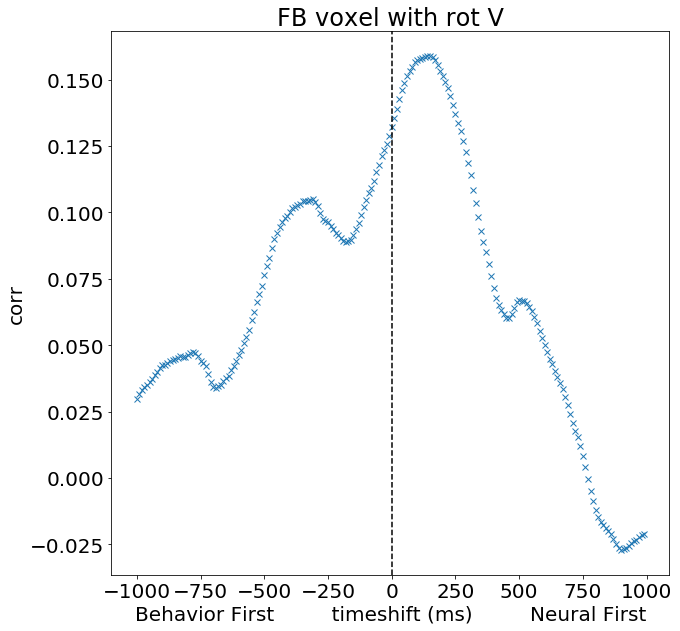

In [257]:
# negative times mean correlation of the earlier behavior with neural data
# ie, if peak is negative, this means that behavior that happens before the neural response is correlated
# ie, the neural data lags behind.
# if there is a peak to the right, that means the neural data best correlates with what is about to happen.

plt.figure(figsize=(10,10))
plt.plot(timepoint_shifts, fictrac_shifts,'x')
plt.axvline(0,color='k',linestyle='--')
#plt.axhline(0,color='k',linestyle='--')
plt.ylabel('corr')
plt.xlabel('Behavior First         timeshift (ms)         Neural First')
plt.title('FB voxel with rot V')
#plt.text(x=-400,y=0.04,s='Behavior\nFirst')

Text(0.5, 1.0, 'FB voxel with rot V')

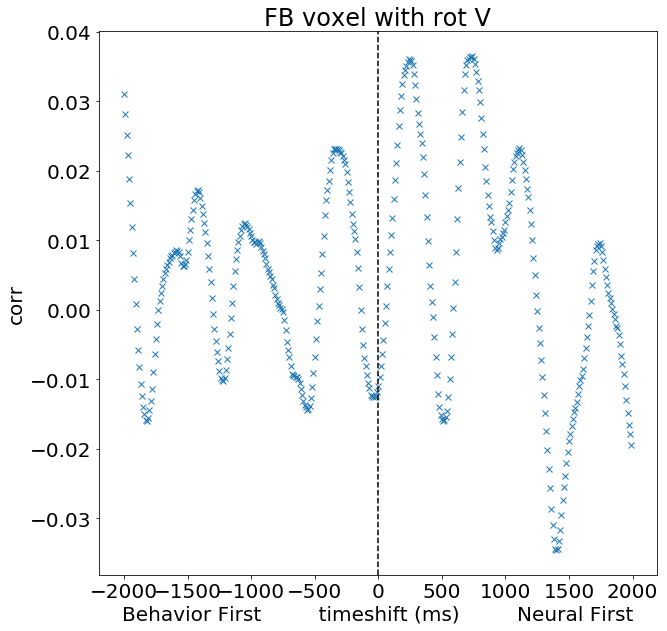

In [239]:
# negative times mean correlation of the earlier behavior with neural data
# ie, if peak is negative, this means that behavior that happens before the neural response is correlated
# ie, the neural data lags behind.
# if there is a peak to the right, that means the neural data best correlates with what is about to happen.

plt.figure(figsize=(10,10))
plt.plot(timepoint_shifts, fictrac_shifts,'x')
plt.axvline(0,color='k',linestyle='--')
#plt.axhline(0,color='k',linestyle='--')
plt.ylabel('corr')
plt.xlabel('Behavior First         timeshift (ms)         Neural First')
plt.title('FB voxel with rot V')
#plt.text(x=-400,y=0.04,s='Behavior\nFirst')

Text(0.5, 1.0, 'FB voxel with forward V')

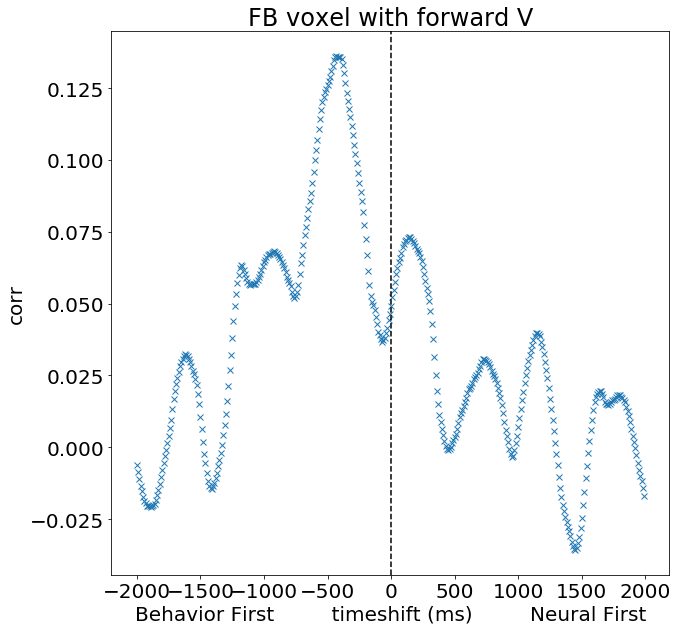

In [236]:
# negative times mean correlation of the earlier behavior with neural data
# ie, if peak is negative, this means that behavior that happens before the neural response is correlated
# ie, the neural data lags behind.
# if there is a peak to the right, that means the neural data best correlates with what is about to happen.

plt.figure(figsize=(10,10))
plt.plot(timepoint_shifts, fictrac_shifts,'x')
plt.axvline(0,color='k',linestyle='--')
#plt.axhline(0,color='k',linestyle='--')
plt.ylabel('corr')
plt.xlabel('Behavior First         timeshift (ms)         Neural First')
plt.title('FB voxel with rot V')
#plt.text(x=-400,y=0.04,s='Behavior\nFirst')

Text(0.5, 1.0, 'FB voxel with forward V')

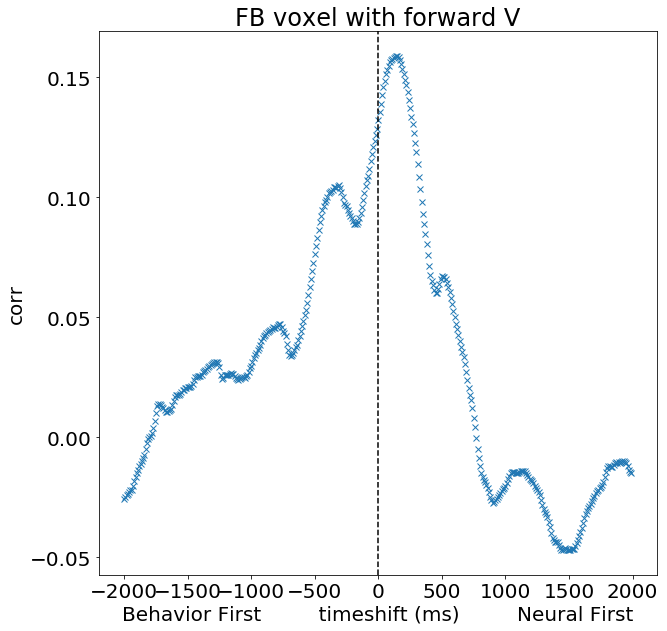

In [243]:
# negative times mean correlation of the earlier behavior with neural data
# ie, if peak is negative, this means that behavior that happens before the neural response is correlated
# ie, the neural data lags behind.
# if there is a peak to the right, that means the neural data best correlates with what is about to happen.

plt.figure(figsize=(10,10))
plt.plot(timepoint_shifts, fictrac_shifts,'x')
plt.axvline(0,color='k',linestyle='--')
#plt.axhline(0,color='k',linestyle='--')
plt.ylabel('corr')
plt.xlabel('Behavior First         timeshift (ms)         Neural First')
plt.title('FB voxel with forward V')
#plt.text(x=-400,y=0.04,s='Behavior\nFirst')

In [83]:
brain_flat = brain[:,:,23,:].reshape(-1,brain.shape[-1])

In [42]:
corrs = []
for i in range(32768):
    corrs.append(scipy.stats.pearsonr(fictrac_interp, brain_flat[i,:])[0])

In [116]:
corrs = np.reshape(corrs, (256,128))

In [45]:
np.argmax(np.nan_to_num(corrs))

12822

In [57]:

scipy.stats.pearsonr(fictrac_interp, brain_flat[12822,:])[0]

0.22040973250318688

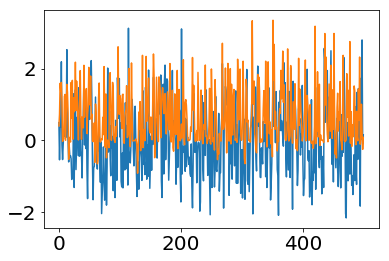

In [52]:
plt.plot(brain_flat[12822,2000:2500])
plt.plot(fictrac_interp[2000:2500]*40)

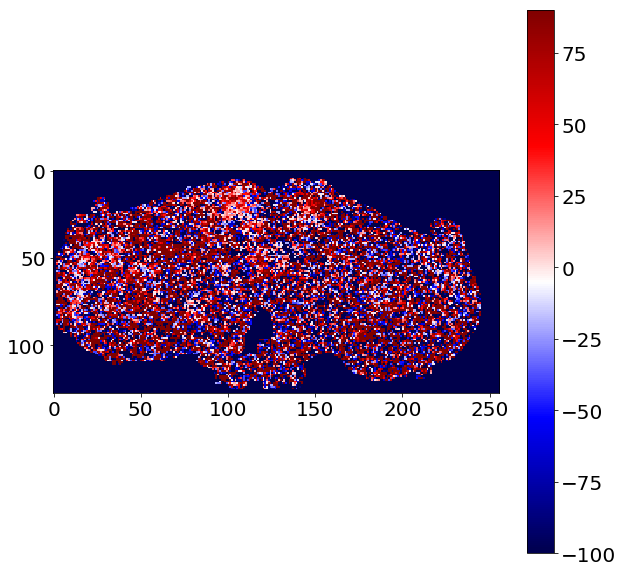

In [149]:
plt.figure(figsize=(10,10))
plt.imshow(lag_time_peak_.T,cmap='seismic')
plt.colorbar()

In [117]:
np.shape(corrs)

(256, 128)

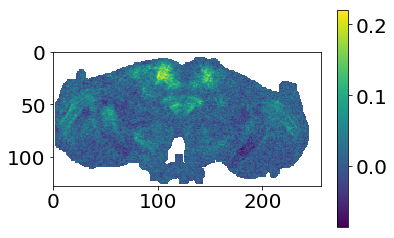

In [124]:
plt.imshow(corrs.T)
plt.colorbar()

In [194]:
blue_FB = 25*256 + 22*256 + 36 + 100
red_FB = 25*256 + 24*256 + 100 + 16

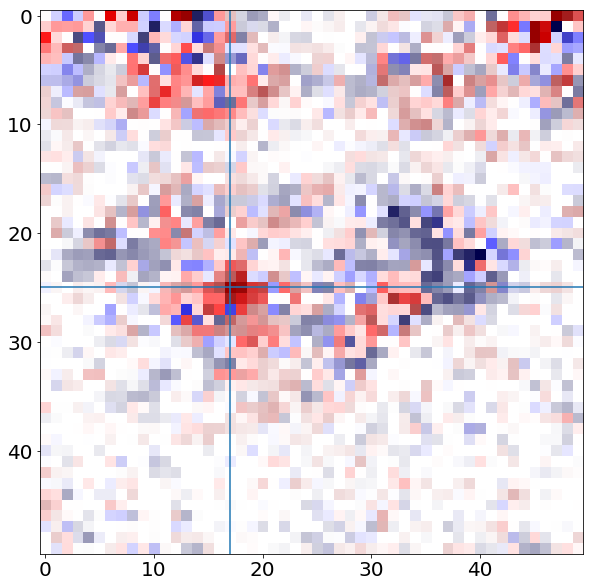

In [198]:
plt.figure(figsize=(10,10))
alphas = Normalize(.01, .15, clip=True)(np.abs(lag_corr_values_))
alphas = np.clip(alphas, 0, 1)  # alpha value clipped at the bottom
# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(-100, 100)(lag_time_peak_)
cmap = plt.cm.seismic
colors = cmap(colors)
# Now set the alpha channel to the one we created above
colors[..., -1] = alphas
to_plot = np.swapaxes(colors,0,1)
plt.imshow(to_plot[25:75,100:150])
#plt.colorbar(cmap)
plt.axvline(17)
plt.axhline(25)

(array([  30., 1099., 8517., 8741., 2615.,  739.,  294.,  140.,   53.,
          14.]),
 array([-0.07461773, -0.04511499, -0.01561224,  0.01389051,  0.04339325,
         0.072896  ,  0.10239875,  0.13190149,  0.16140424,  0.19090699,
         0.22040973]),
 <a list of 10 Patch objects>)

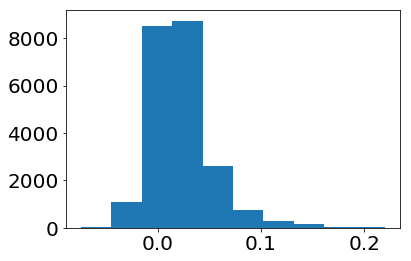

In [200]:
plt.hist(lag_corr_values_.ravel())

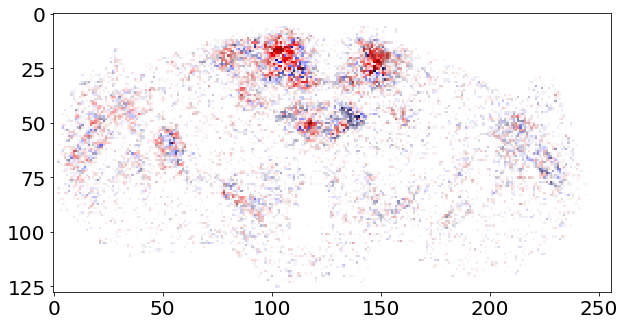

In [249]:
plt.figure(figsize=(10,10))
alphas = Normalize(.02, .15, clip=True)(np.abs(lag_corr_values_))
alphas = np.clip(alphas, 0, 1)  # alpha value clipped at the bottom
# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(-100, 100)(lag_time_peak_)
cmap = plt.cm.seismic
colors = cmap(colors)
# Now set the alpha channel to the one we created above
colors[..., -1] = alphas
to_plot = np.swapaxes(colors,0,1)
plt.imshow(to_plot)
#plt.colorbar(cmap)
#plt.axvline(117,linestyle='--',color='k')
#plt.axhline(50,linestyle='--',color='k')

#plt.xlim(100,150)
#plt.ylim(40,60)

In [ ]:
corrs = []
for i in range(n_clusters):
    corrs.append(scipy.stats.pearsonr(fictrac['Y'], signals[i,:])[0])